**Автор: Анна Смелова**

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Решение домашнего задания к уроку 2 “Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск”

### Задание 1
Используя файл Lesson_2_extended.ipynb (он в web2.zip в материалах)
#### Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

Исходные данные:

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Стандартизация:

In [3]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [4]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    print(f'lambda={reg}')
    W = np.random.randn(X_st.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X_st.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
    
    print(f'Weights: {W}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [7]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

lambda=0.0001
Weights: [37.48984722  6.08793178 -2.02765512 11.0558095 ]
Final MSE: 25.82222331579762


In [8]:
y1 = []
y2 = []
y3 = []
y4 = []
#a_reg = np.logspace(-3, 2, 100)
a_reg = np.linspace(1e-4, 1, 100)
for coef in a_reg:
    weights = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=coef)
    y1.append(weights[0])
    y2.append(weights[1])
    y3.append(weights[2])
    y4.append(weights[3])

lambda=0.0001
Weights: [37.57194518  6.08853656 -1.9945298  11.00887182]
Final MSE: 25.790744102587233
lambda=0.010199999999999999
Weights: [14.68256815  1.12094126 -2.97587145 20.19371888]
Final MSE: 108.59995422990073
lambda=0.0203
Weights: [12.29213048  0.71165209 -1.54296974 18.66550417]
Final MSE: 205.96410102397067
lambda=0.0304
Weights: [10.82591278  0.67403572 -0.81383032 17.18747046]
Final MSE: 317.1097845759048
lambda=0.0405
Weights: [ 9.74620831  0.69246791 -0.38484674 15.89277638]
Final MSE: 432.4969081093112
lambda=0.0506
Weights: [ 8.8931395   0.71308685 -0.11278002 14.76895152]
Final MSE: 546.9105539264876
lambda=0.060700000000000004
Weights: [ 8.19277573  0.72608325  0.06776253 13.78949995]
Final MSE: 657.634186534546
lambda=0.0708
Weights: [ 7.60326956  0.73110489  0.19111335 12.93009188]
Final MSE: 763.3307942943303
lambda=0.0809
Weights: [ 7.09809109  0.72973601  0.27696871 12.17066497]
Final MSE: 863.4335793709473
lambda=0.091
Weights: [ 6.65917071  0.72367011  0.33

Weights: [1.28369058 0.2270911  0.21090141 2.35120902]
Final MSE: 2739.4628478806935
lambda=0.8080999999999999
Weights: [1.26911851 0.2247217  0.20881804 2.32479295]
Final MSE: 2745.9940726063996
lambda=0.8181999999999999
Weights: [1.25487381 0.22240074 0.20677423 2.29896388]
Final MSE: 2752.3879741369883
lambda=0.8282999999999999
Weights: [1.24094556 0.22012677 0.2047689  2.27370246]
Final MSE: 2758.6488256566386
lambda=0.8383999999999999
Weights: [1.22732332 0.21789839 0.20280102 2.24899018]
Final MSE: 2764.780725443739
lambda=0.8484999999999999
Weights: [1.2139971  0.21571425 0.2008696  2.22480933]
Final MSE: 2770.7876056974437
lambda=0.8585999999999999
Weights: [1.20095736 0.21357308 0.19897366 2.20114294]
Final MSE: 2776.673240837157
lambda=0.8686999999999999
Weights: [1.18819496 0.21147362 0.19711228 2.17797478]
Final MSE: 2782.441255311126
lambda=0.8787999999999999
Weights: [1.17570112 0.20941468 0.19528455 2.15528926]
Final MSE: 2788.0951309475536
lambda=0.8888999999999999
Weig

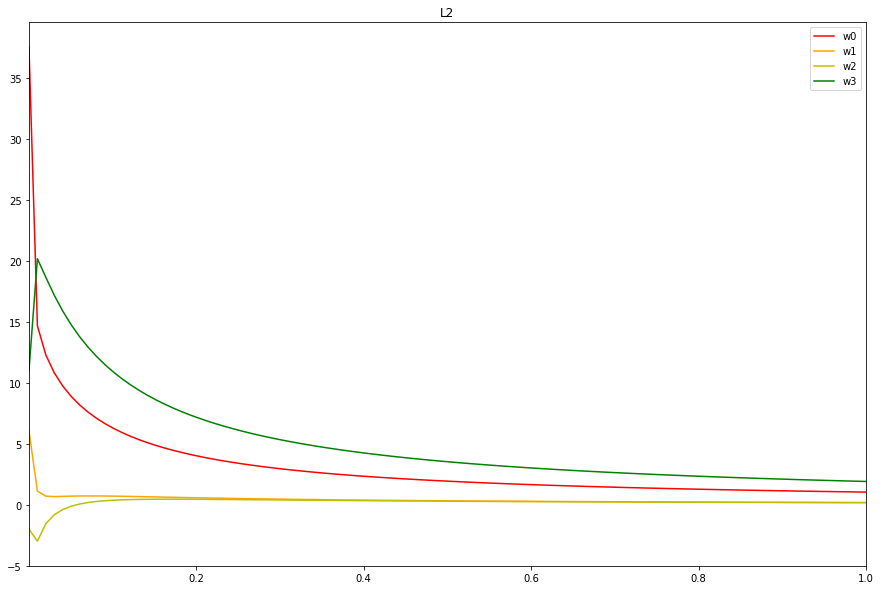

In [9]:
fig, axes = plt.subplots(figsize=(15,10))
plt.xlim(1e-4,1)
plt.plot(a_reg, y1, color='r', label = 'w0')
plt.plot(a_reg, y2, color='orange', label = 'w1')
plt.plot(a_reg, y3, color='y', label = 'w2')
plt.plot(a_reg, y4, color='g', label = 'w3')
plt.legend()
plt.title('L2')
plt.show()

**Вывод:** Чем выше коэффициент регуляризации, тем ниже сложность модели. Поэтому, при увеличении lambda, веса стремятся к нулю. При этом они не достигают его. При квадратичном члене чем ближе спускаемся к нулю, тем меньшей становится производная, пока также не приблизится к нулю. При Ridge-регуляризации когда веса уже малы, дальнейший градиентный спуск их сильно не изменит.

### Задание 2
Используя файл Lesson_2_extended.ipynb (он в web2.zip в материалах)
#### Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

#### $L_2$-регуляризация (ridge, регуляризация Тихонова)

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

#### $L_1$-регуляризация (lasso, регуляризация через манхэттенское расстояние)

По аналогии существует также **$L_{1}$-регуляризация**, использующая в качестве регуляризатора $L_{1}$-норму вектора весов, то есть сумму модулей весов.

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$
<center>Производная</center>

$$d\lambda |w| = \lambda sign(w) $$

Такой метод часто используется для отбора признаков: у менее ценных признаков гораздо раньше обнуляются веса.

In [10]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    print(f'lambda={reg}')
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
    
    print(f'Weights: {W}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [11]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

lambda=0.0001
Weights: [40.63050797  6.26831222 -0.96291586  9.3063979 ]
Final MSE: 25.006362166923893


In [12]:
y1 = []
y2 = []
y3 = []
y4 = []
#a_reg = np.logspace(-3, 2, 100)
a_reg = np.linspace(1e-4, 2, 100)
for coef in a_reg:
    weights = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=coef)
    y1.append(weights[0])
    y2.append(weights[1])
    y3.append(weights[2])
    y4.append(weights[3])

lambda=0.0001
Weights: [40.68878693  6.26874154 -0.93940115  9.2730782 ]
Final MSE: 24.998912026336466
lambda=0.0203010101010101
Weights: [ 3.41211113e+01  2.66573819e+00 -1.47004447e-02  1.25654684e+01]
Final MSE: 32.742702414172
lambda=0.040502020202020206
Weights: [26.99136252  0.06909659 -0.05617216 16.16764126]
Final MSE: 50.24575175509294
lambda=0.06070303030303031
Weights: [23.957121    0.07347613  0.02562547 17.35736107]
Final MSE: 59.854962052040875
lambda=0.08090404040404041
Weights: [20.95412021 -0.04932992 -0.10377262 18.52799675]
Final MSE: 72.4617494601339
lambda=0.10110505050505052
Weights: [17.89157878 -0.02104466 -0.11963801 19.73718893]
Final MSE: 89.08979550638665
lambda=0.12130606060606061
Weights: [ 1.48747601e+01 -9.55411369e-02 -1.45159267e-02  2.09171401e+01]
Final MSE: 110.13071380525355
lambda=0.1415070707070707
Weights: [ 1.18340827e+01 -9.75451137e-02 -9.38957596e-03  2.21128008e+01]
Final MSE: 134.44412334725854
lambda=0.1617080808080808
Weights: [ 8.801278

Weights: [ 0.28071913  1.25926034 -0.5960742   8.90511981]
Final MSE: 1737.0915518150875
lambda=1.4545727272727274
Weights: [-0.49711104  0.3201961   0.79273069  8.68904158]
Final MSE: 1832.8797048512256
lambda=1.4747737373737373
Weights: [1.15299483 1.16607159 0.99639268 8.39423126]
Final MSE: 1729.611785496019
lambda=1.4949747474747475
Weights: [ 1.19055799 -0.17910991  1.10319732  8.04937684]
Final MSE: 1788.91826860314
lambda=1.5151757575757576
Weights: [ 1.84882219  0.47607908 -0.86614858  7.80315635]
Final MSE: 1781.2478333043005
lambda=1.5353767676767678
Weights: [-0.57930536  0.16475944  0.5097192   7.46525838]
Final MSE: 2031.320063417093
lambda=1.5555777777777777
Weights: [2.39175812 0.72634433 0.10229024 7.14690932]
Final MSE: 1820.8848662533164
lambda=1.575778787878788
Weights: [0.95192527 0.92886078 0.27341645 6.82820747]
Final MSE: 1989.3970717326508
lambda=1.595979797979798
Weights: [ 2.4487126  -0.90807919  0.97405721  6.58652277]
Final MSE: 1913.6794656962225
lambda=1.

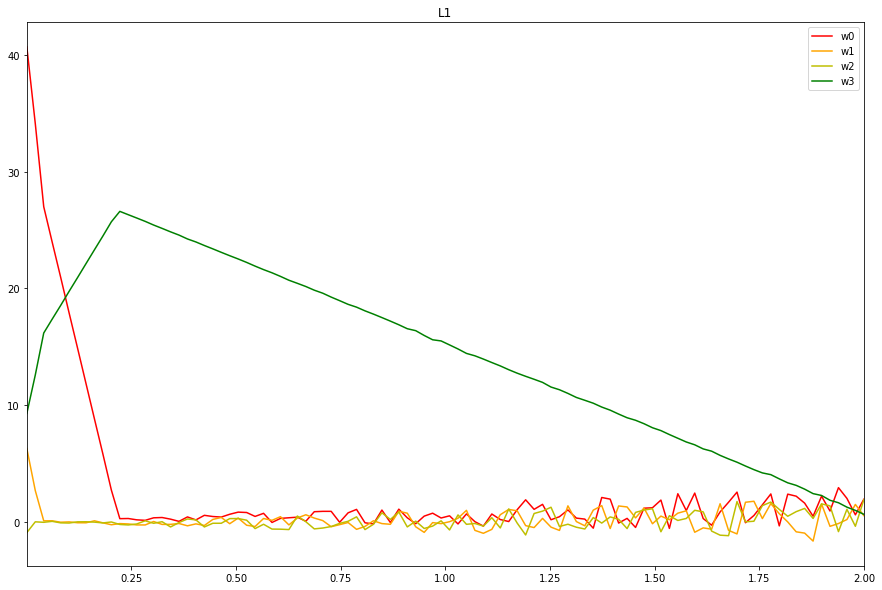

In [13]:
fig, axes = plt.subplots(figsize=(15,10))
plt.xlim(1e-4,2)
plt.plot(a_reg, y1, color='r', label = 'w0')
plt.plot(a_reg, y2, color='orange', label = 'w1')
plt.plot(a_reg, y3, color='y', label = 'w2')
plt.plot(a_reg, y4, color='g', label = 'w3')
plt.legend()
plt.title('L1')
plt.show()

### Задание 3*
#### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

**Ответ:** можно, только **практического смысла в этом нет**, т.к. применение второго метода масштабирования "затрет" результаты применения первого метода.
Проверим, применив последовательно и нормализацию и стандартизацию на рандомно сгенерированном наборе данных.

In [14]:
# сгенерируем 2 одинаковых массива  
c = np.random.randint(0, 100, 10)
c = c.astype(float)
a = c.copy()
b = c.copy()
b

array([53., 93., 93., 13.,  0., 46., 47., 66., 90., 36.])

In [15]:
print(f'Исходный массив: {a}\n')
# к массиву а применим сначала метод нормализации
a_min = np.min(a)
a_max = np.max(a)
print(f'min = {a_min}, max = {a_max}\n')
d = a_max - a_min
# вычтем из каждого значения признака минимум и поделим на разность между максимумом и минимумом
for i in range(len(a)):
    a[i] = (a[i] - a_min) / d
a_norm = a.copy()
print(f'a - norm: {a}\n')
# затем применим метод стандартизации
a_mean = np.mean(a)
a_std = np.std(a)
print(f'mean = {a_mean}, std = {a_std}\n')
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(len(a)):
    a[i] = (a[i] - a_mean) / a_std

print(f'a - norm - stand: {a}')

Исходный массив: [53. 93. 93. 13.  0. 46. 47. 66. 90. 36.]

min = 0.0, max = 93.0

a - norm: [0.56989247 1.         1.         0.13978495 0.         0.49462366
 0.50537634 0.70967742 0.96774194 0.38709677]

mean = 0.5774193548387097, std = 0.3317008237352503

a - norm - stand: [-0.02269178  1.2739813   1.2739813  -1.31936485 -1.7407836  -0.24960957
 -0.21719274  0.39872697  1.17673081 -0.57377784]


In [16]:
print(f'Исходный массив: {b}\n')
# к массиву b сначала применим метод стандартизации
b_mean = np.mean(b)
b_std = np.std(b)
print(f'mean = {b_mean}, std = {b_std}\n')
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(len(b)):
    b[i] = (b[i] - b_mean) / b_std
b_stand = b.copy()
print(f'b - stand: {b}\n')
# затем применим метод нормализации
b_min = np.min(b)
b_max = np.max(b)
print(f'min = {b_min}, max = {b_max}\n')
d = b_max - b_min
# вычтем из каждого значения признака минимум и поделим на разность между максимумом и минимумом
for i in range(len(b)):
    b[i] = (b[i] - b_min) / d

print(f'b - stand - norm: {b}')

Исходный массив: [53. 93. 93. 13.  0. 46. 47. 66. 90. 36.]

mean = 53.7, std = 30.848176607378274

b - stand: [-0.02269178  1.2739813   1.2739813  -1.31936485 -1.7407836  -0.24960957
 -0.21719274  0.39872697  1.17673081 -0.57377784]

min = -1.7407836023331125, max = 1.2739812955622218

b - stand - norm: [0.56989247 1.         1.         0.13978495 0.         0.49462366
 0.50537634 0.70967742 0.96774194 0.38709677]


Теперь выведем полученные результаты для сравнения:

In [17]:
print(f'Исходный массив: \n{c}\n')

print(f'После одной нормализации: \n{a_norm}')
print(f'После стандартизации и последующей нормализации: \n{b}\n')

print(f'После одной стандартизации: \n{b_stand}')
print(f'После нормализации и последующей стандартизации: \n{a}')

Исходный массив: 
[53. 93. 93. 13.  0. 46. 47. 66. 90. 36.]

После одной нормализации: 
[0.56989247 1.         1.         0.13978495 0.         0.49462366
 0.50537634 0.70967742 0.96774194 0.38709677]
После стандартизации и последующей нормализации: 
[0.56989247 1.         1.         0.13978495 0.         0.49462366
 0.50537634 0.70967742 0.96774194 0.38709677]

После одной стандартизации: 
[-0.02269178  1.2739813   1.2739813  -1.31936485 -1.7407836  -0.24960957
 -0.21719274  0.39872697  1.17673081 -0.57377784]
После нормализации и последующей стандартизации: 
[-0.02269178  1.2739813   1.2739813  -1.31936485 -1.7407836  -0.24960957
 -0.21719274  0.39872697  1.17673081 -0.57377784]


### Задание 4*
#### Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [18]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=7, coef=True, random_state=20)
X[:, 0] *= 10
display(X, Y, coef)

array([[  5.49114979,  -0.82341611],
       [ -0.47628327,   0.11810663],
       [  5.92204984,  -1.49276347],
       ...,
       [  9.36087252,  -0.86843495],
       [ 11.89392657,  -1.08935443],
       [-19.87473547,   0.65282921]])

array([-4.27210572e+01,  1.48538386e+01, -1.09178797e+02,  7.97867672e+01,
        2.32006690e+01,  2.45450317e+01,  6.87066145e+01,  9.90605089e+01,
       -7.22824588e+01,  3.96621868e+00,  4.41537395e+01, -2.95943497e+01,
       -4.50526438e+01,  5.10486890e+01, -2.81153416e+00,  1.65073882e+02,
        7.86072016e+00, -2.74369011e+01,  3.74235853e+00, -2.81634098e+01,
       -4.95666986e+01,  5.49013705e+01,  4.51560545e+00,  2.08758369e+01,
       -8.27414664e+00, -1.60429271e+01, -2.98381565e+01,  3.80730414e+01,
        1.40018284e+02,  3.98107089e+00,  4.31593217e+01, -8.92007177e+00,
       -4.80715512e+01, -5.86751661e+01, -1.39387073e+02, -1.71624555e+02,
        1.15269062e+02,  6.70170608e+01,  5.75659982e+01,  7.99999668e+01,
       -3.93778805e+01, -7.84923357e+01, -9.01518511e+01,  9.23072909e+01,
        1.95927679e+01, -2.94164085e+01, -5.47212482e+01,  4.49391237e+01,
       -1.09896359e+01,  5.73121943e+00, -1.16352772e+01, -1.18346282e+01,
        1.55938851e+02, -

array([37.8351338, 79.974115 ])

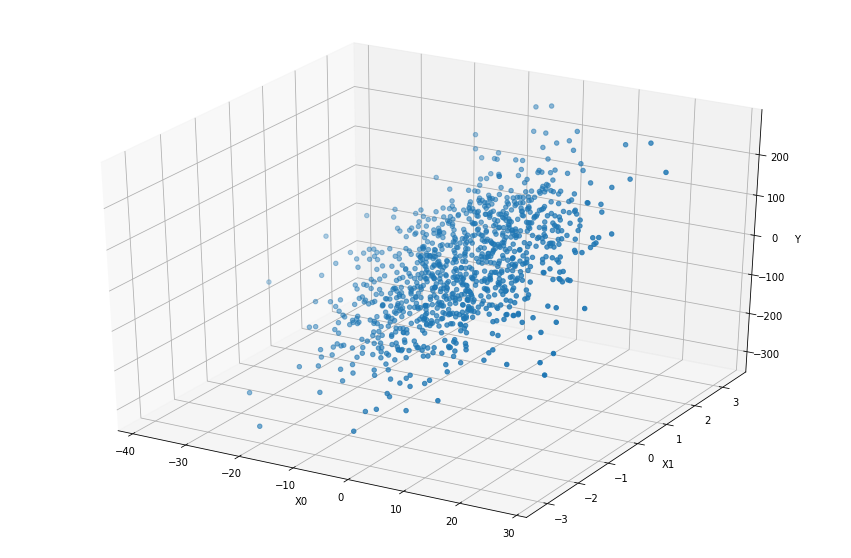

In [19]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

Отмасштабируем получившиеся признаки методом стандартизации.

In [20]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.44393033,  0.03207499])

array([9.62253651, 1.03094346])

In [21]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [22]:
X

array([[ 0.61678957, -0.82981379],
       [-0.00336221,  0.08344943],
       [ 0.66156986, -1.47907089],
       ...,
       [ 1.01894161, -0.8734814 ],
       [ 1.28218343, -1.08777005],
       [-2.01930178,  0.60212247]])

In [23]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([ 8.88178420e-19, -4.09672296e-17])

array([1., 1.])

In [24]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Градиентный спуск

In [25]:
def gradient_descent(X, Y, eta=0.01, max_iter = 1e5, min_weight_dist = 1e-8):
    # инициализируем начальный вектор весов
    w = np.zeros(X.shape[1])

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        y_pred = np.dot(X, w)
        dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
        new_w = w - eta * dQ
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        error = mserror(X, new_w, Y)
    
        w_list.append(new_w.copy())
        errors.append(error)
        
        if iter_num % 100 == 0:
            print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    
        iter_num += 1
        w = new_w
    
    w_list = np.array(w_list)
    w_pred = w_list[-1]

    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    
    return w_list,errors

In [26]:
%%time
w_list_gd,errors_gd = gradient_descent(X, Y, eta=0.01, max_iter = 1e4, min_weight_dist = 1e-8)

Iter 0: error - 7772.289536883242, weights: [0.69122559 1.63743871]
Iter 100: error - 193.30370970611355, weights: [31.25991295 71.74656854]
Iter 200: error - 49.84552270119622, weights: [35.77454518 81.25420337]
Iter 300: error - 47.11945877118336, weights: [36.43579836 82.54595214]
Iter 400: error - 47.067483069827524, weights: [36.53199588 82.72176603]
Iter 500: error - 47.066489263211935, weights: [36.54591176 82.74573552]
Iter 600: error - 47.06647021516747, weights: [36.5479153 82.7490086]
Iter 700: error - 47.06646984933634, weights: [36.54820261 82.74945622]
Iter 800: error - 47.066469842298325, weights: [36.54824367 82.74951752]
Iter 900: error - 47.06646984216273, weights: [36.54824952 82.74952592]
В случае использования градиентного спуска функционал ошибки составляет 47.0665
CPU times: user 651 ms, sys: 12.5 ms, total: 663 ms
Wall time: 440 ms


Стохастический градиентный спуск

In [27]:
def stohastic_gradient_descent(X, Y, eta=0.01, max_iter = 1e5, min_weight_dist = 1e-8):
    # инициализируем начальный вектор весов
    w = np.zeros(X.shape[1])

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    np.random.seed(1234)

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0], size=1)

        y_pred = np.dot(X[train_ind], w)
        new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        error = mserror(X, new_w, Y)

        w_list.append(new_w.copy())
        errors.append(error)

        if iter_num % 100 == 0:
            print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')
    
    return w_list,errors

In [28]:
%%time
w_list_sgd,errors_sgd = stohastic_gradient_descent(X, Y, eta=0.01, max_iter = 1e4, min_weight_dist = 1e-8)

Iteration #0: W_new = [0.11950381 0.04814012], MSE = 8068.96
Iteration #100: W_new = [28.7291289  69.45060016], MSE = 280.07
Iteration #200: W_new = [35.18744514 79.70248054], MSE = 58.0
Iteration #300: W_new = [36.7804826  82.05762946], MSE = 47.61
Iteration #400: W_new = [36.52362598 82.95011376], MSE = 47.11
Iteration #500: W_new = [38.08446042 82.96857633], MSE = 49.46
Iteration #600: W_new = [36.04183208 82.46744998], MSE = 47.4
Iteration #700: W_new = [36.41917501 82.11463496], MSE = 47.48
Iteration #800: W_new = [36.97013548 82.50101356], MSE = 47.31
Iteration #900: W_new = [36.97767856 83.67005205], MSE = 48.08
Iteration #1000: W_new = [36.77154224 82.53881456], MSE = 47.16
Iteration #1100: W_new = [37.00057258 83.86609959], MSE = 48.49
Iteration #1200: W_new = [36.83010453 82.64831138], MSE = 47.16
Iteration #1300: W_new = [36.14678927 81.49725805], MSE = 48.77
Iteration #1400: W_new = [36.35726295 83.03205887], MSE = 47.19
Iteration #1500: W_new = [37.00051681 83.62204757], M

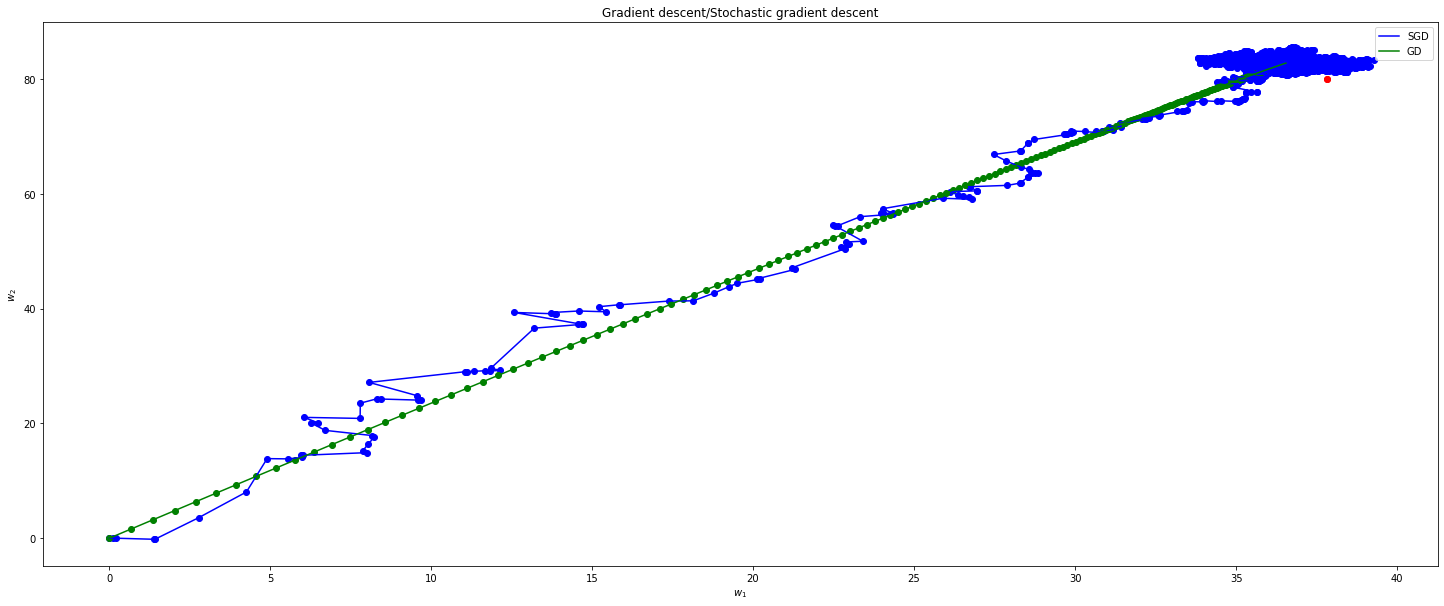

In [29]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(25, 10))
plt.title('Gradient descent/Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_sgd[:, 0], w_list_sgd[:, 1], c='b')
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list_sgd[:, 0], w_list_sgd[:, 1], c='b', label = 'SGD')

plt.scatter(w_list_gd[:, 0], w_list_gd[:, 1], c='g')
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list_gd[:, 0], w_list_gd[:, 1], c='g', label = 'GD')

plt.legend()
plt.show()

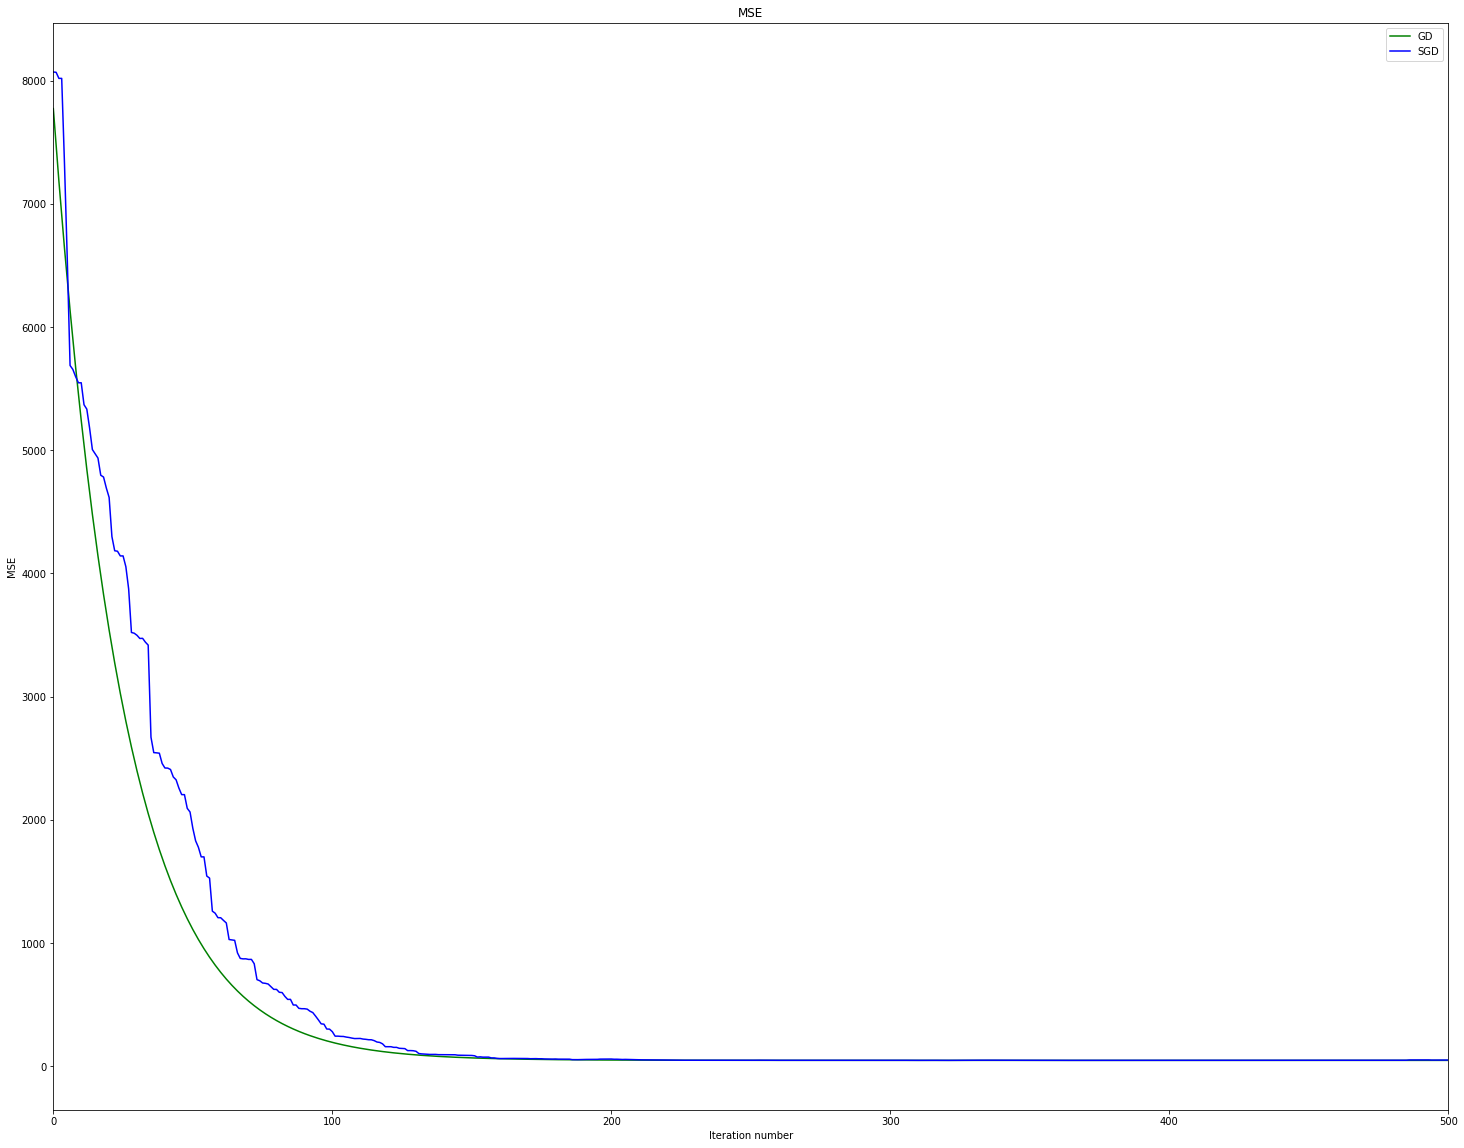

In [30]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(25, 20))
plt.xlim(0,500)
plt.plot(range(len(errors_gd)), errors_gd, c='g', label='GD')
plt.plot(range(len(errors_sgd)), errors_sgd, c='b', label='SGD')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()

**Вывод:** для данного конкретного датасета получилось, что скорости сходимости обоих методов примерно одинаковы(если судить о скорости приближения ошибки к нулю на последнем графике), хотя градиентный спуск немного выигрывает. При этом градиентный спуск быстрее достиг критерия останова цикла, поэтому ему потребовалось меньше времени на вычисление коэффициентов, чем стохастическому градиентному спуску.